In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../../modules')

In [48]:
import numpy as np
import common_plots as plots
import factors

# Common Distributions
There are many different natural distributions, some of which are covered here: <br>

## Discrete Distributions
The probability function for a discrete set of events/models is called the probability mass function. It assigns a probability to each individual event, such that the probabilities sum to 1. 
### The Bernoulli Distribution
The Bernoulli distribution has two possible outcomes, "yes" or "no", predicted by a single variable $p$, the probability of "yes". The probability of "yes" is given by $p$ the probability of "no" is given $1-p$. Often "heads" ($h$) and "tails" ($t$) are used instead due to the comparison with a bent coin. 
### The Binomial Distribution
The binomial distribution describes the probabilities for a set of bernoulli samples. The total number of "yes" or "heads" results, $k$, for $n$ trials is given:
$$p(k|n,p)=\frac{p^k (1-p)^{n-k}n!}{k!(n-k)!}$$
Which can be rewriten: <br>
$$p(k|n,p)={n \choose k} p^k (1-p)^{n-k}$$


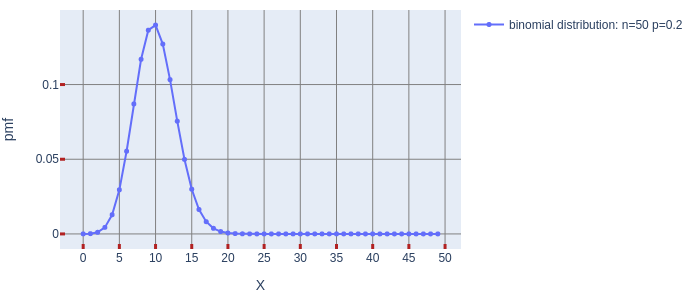

In [46]:
# A binomial distribution with low chance of heads skews left
fig = plots.plot_binomial(p=0.2,n=50)
fig.show(renderer="png",width=700,height=300)

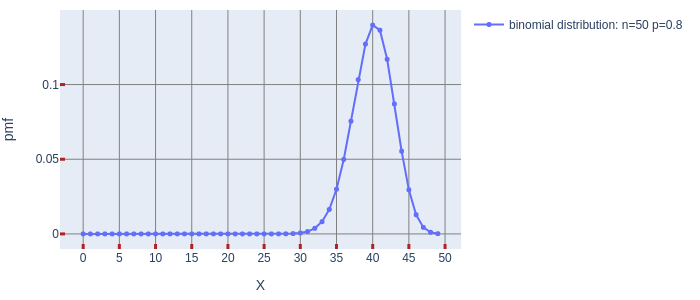

In [47]:
# Likewise a high change of heads skews right
fig = plots.plot_binomial(p=0.8,n=50)
fig.show(renderer="png",width=700,height=300)

### Categorical distribution
The categorical distribution is just the extension of the bernoulli distribution to more than 2 possibilities. For instance, a factor with 1 variable can represent a categorical distribution:

In [58]:
f = factors.Factor(["variable A"], [4])
f.set_all(([0.5,0.25,0.05,0.2]))
print(f)

variable A  Values (10 dp)
0           0.5
1           0.25
2           0.05
3           0.2



### Multinomial distribution
The multinomial distribution is the extension of the binomial to categorical samples. The probability for $n$ trials where $i$ is the index of the variable and $k$ is the number of categorical variables and $x_i$ is the variable counts is given:
$$ \frac{n!}{\prod_{i=0}^k x_i}\prod_{i=0}^k p_i^{x_i} $$
Where $p_i$ is the probability of the $i$th categorical outcome such that $\sum_{i=0}^k p_i =1$

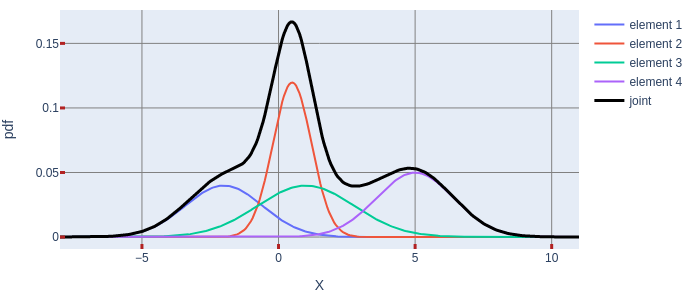

In [6]:
means = [-2,0.5,1,5]
sigmas = [2,1,2.5,2]
weights = [0.2,0.3,0.25,0.25]
fig = plots.plot_1D_MoG(means,sigmas,weights)
fig.show(renderer="png",width=700,height=300)